# **Dimensionality analysis** 

## **Analysis of $(n,p)$ combination of parameters**

$n:= $ number of nurse-doctor tandem that  the hospital has in a given day.

$p:=$ number of patients that visit the hospital in a given day.

In this section we will carry out a big data analysis of the linear model, in the sense that we will analyze how the model performs with big dimensionality (big $(n,p)$ combinations). We will don't apply this analysis to the integer model because the same results in terms of time would be obtained, so it wouldn't be very fruitful.

On one hand, we are going to analyze the execution time of the model for those combinations. And, on the other hand, we will analyze the metrics seen before, focusing on these parameters.

- Enforcing the number of patients seen to be the maximum possible $(p)$, setting $h_3^{12} > h_3^{12} > \dots > h_3^{12} > 0$.

In [241]:
# Defining the values of the rest of parameters and setting h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10 as None.
params['n'] = None ; params['p']=None ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.1 
params['h3_3_4'] = 0.30
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

params['w'] = None

# Defining the parameter combination values as a list.
p_list = [100, 300, 500, 2000, 5000]
n_list = [50, 300, 700]
np.random.seed(123)
w_dict = {p: np.random.randint(1, 11, p) for p in p_list}
param_combi_list_1 = product(n_list, p_list)
param_combi_list_1 = list(param_combi_list_1)
param_combi_list_2 = [(n,p, w_dict[p]) for (n,p) in param_combi_list_1]

# Defining the parameter names as a tuple.
param_names = ('n', 'p', 'w')

In [242]:
# results1_multi = get_results1_multi(('n', 'p', 'w'), param_combi_list_2, params, model='linear')

In [243]:
# results2_multi = get_results2_multi(('n', 'p', 'w'), results1_multi, n_p_analysis=True, w_dict=w_dict)

In [244]:
# save a dictionary as a pickle
#with open('results1_multi_n_p.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results1_multi, file)

#with open('results2_multi_n_p.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results2_multi, file)

In [245]:
# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results1_multi_n_p.pickle", 'rb') as file:
    # Read back the pickled file
    results1_multi = pickle.load(file)

# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results2_multi_n_p.pickle", 'rb') as file:
    # Read back the pickled file
    results2_multi = pickle.load(file)
# Time: 2.45 - 3.21 mins

In [246]:
param_combi_str = [str(x) for x in param_combi_list_1]
problem_dimension_str = [str(round(n*p/1000))+'k' for (n,p) in param_combi_list_1]
problem_dimension = [n*p/1000 for (n,p) in param_combi_list_1]
patient_tandem_ratio_str = [str(round(p/n, 2)) for (n,p) in param_combi_list_1] # number patients per nurse-doctor tandem

param_combi_feasible = [x for x in results2_multi[param_names]['feasible']]
param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]
problem_dimension_feasible_str = [str(round(n*p/1000))+'k' for (n,p) in results2_multi[param_names]['feasible']]
patient_tandem_ratio_feasible_str = [str(round(p/n, 2)) for (n,p) in results2_multi[param_names]['feasible']] 

- **Model execution time vs $(n,p)$**

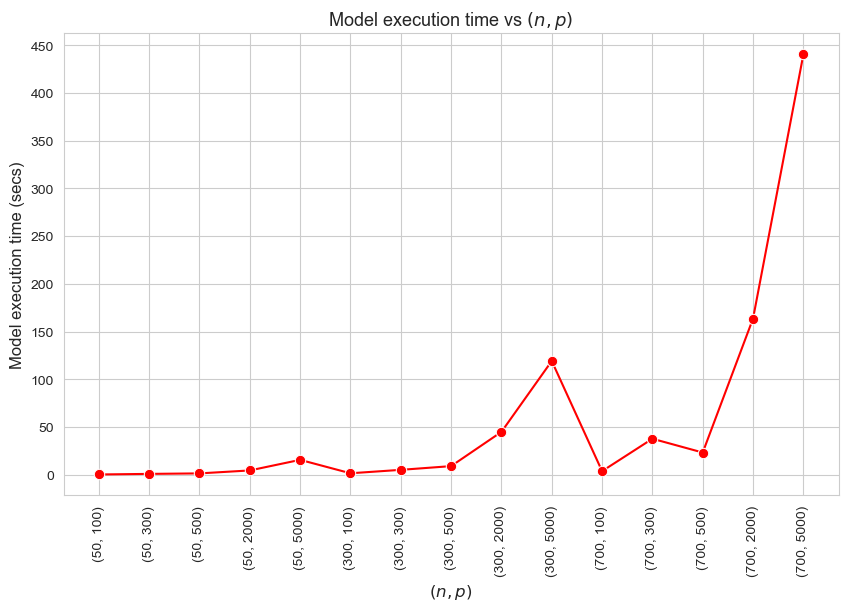

In [247]:
plt.subplots(figsize=(10,6))
ax = sns.lineplot(y=[results1_multi[param_names][i]['model_time'] for i in param_combi_list_1], 
                     x=param_combi_str, 
                     marker='o', markersize=7.5, color='red')
plt.title('Model execution time vs $(n, p)$', fontsize=13) 
ax.set_xlabel('$(n, p)$', fontsize=12, rotation=0)
ax.set_ylabel('Model execution time (secs)', fontsize=12)
plt.yticks(np.arange(0, 500, 50))
plt.xticks(rotation=90)
plt.show()

- **Model execution time vs Problem dimensionality $(n\cdot p)$**

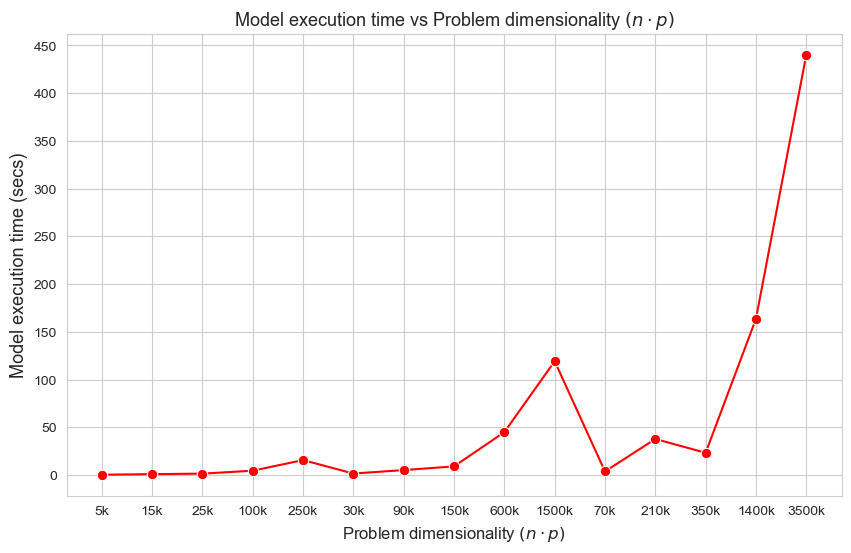

In [248]:
plt.subplots(figsize=(10,6))
ax = sns.lineplot(y=[results1_multi[param_names][i]['model_time'] for i in param_combi_list_1], 
                     x=problem_dimension_str, 
                     marker='o', markersize=7.5, color='red')
plt.title('Model execution time vs Problem dimensionality $(n\cdot p)$', fontsize=13) 
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', fontsize=12)
ax.set_ylabel('Model execution time (secs)', fontsize=13)
plt.yticks(np.arange(0, 500, 50))
plt.show()

**Interpretation of the results:**

These results  have an easy and intuitive interpretation.

When the dimensionality of the problem increase (in this case $n\cdot p$), the execution time of the model increases as well. And vice versa.


- **Type vs $(n,p)$**

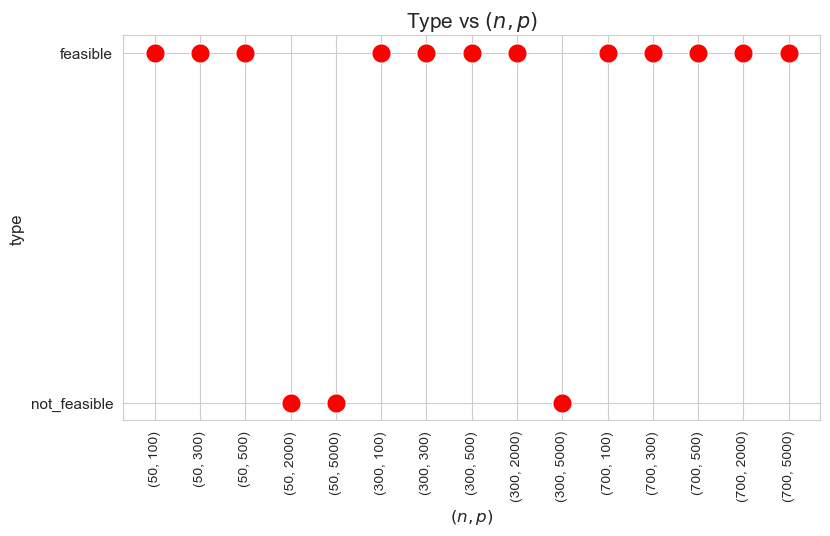

In [249]:
plt.figure(figsize=(9, 5))
param_combi_str = [str(x) for x in param_combi_list_1]
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=param_combi_str, color='red', s=200)
plt.title('Type vs $(n,p)$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_str, fontsize=10, rotation=90)
plt.yticks(fontsize=11)
plt.show()

- **Type vs Problem dimensionality $(n\cdot p)$**

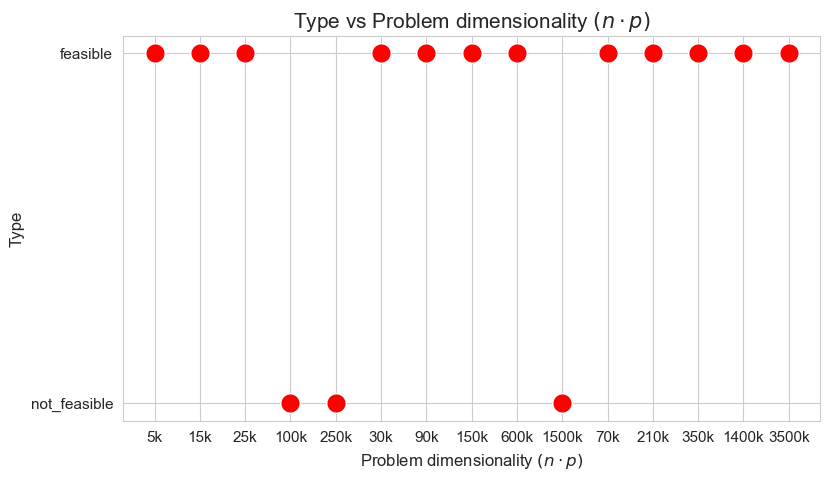

In [250]:
plt.figure(figsize=(9, 5))
param_combi_str = [str(x) for x in param_combi_list_1]
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=problem_dimension_str, color='red', s=200)
plt.title('Type vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('Type', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_str, fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.show()

- **Type vs Ratio patients per tandem $(p/n)$**

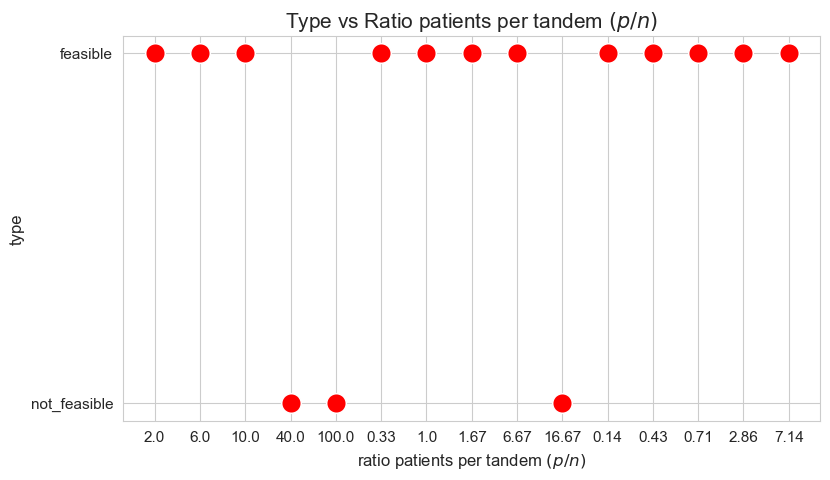

In [251]:
plt.figure(figsize=(9, 5))
param_combi_str = [str(x) for x in param_combi_list_1]
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=patient_tandem_ratio_str, color='red', s=200)
plt.title('Type vs Ratio patients per tandem $(p/n)$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('ratio patients per tandem $(p/n)$', size=12)
plt.xticks(patient_tandem_ratio_str, fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When the ratio patients per tandem $(p/n)$ is large enough, the problem becomes not feasible, as there are not enough tandems to handle such amount of patients, since minimum work constrains cannot be satisfy under good working conditions. 


- **Number of patients seen vs $(n,p)$**

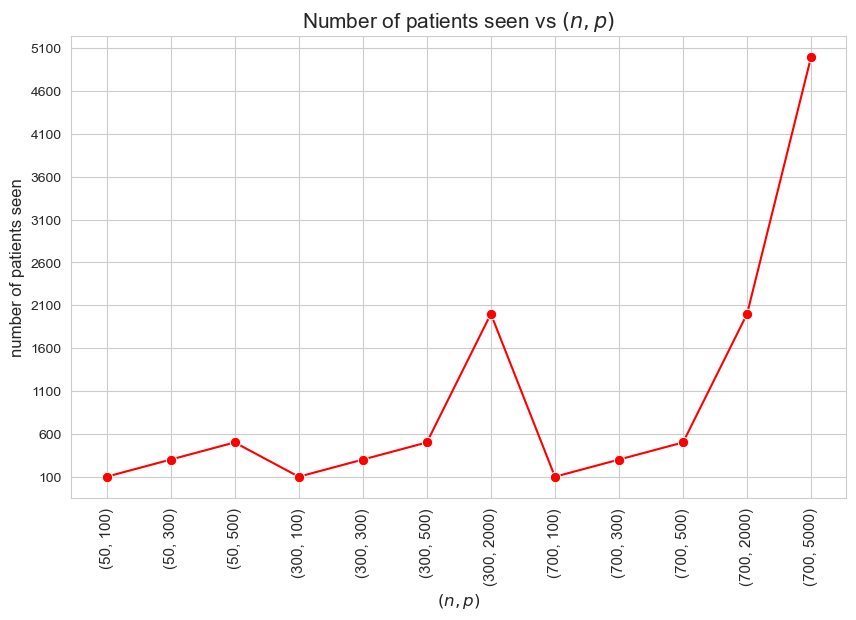

In [252]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['num_patients_seen'].values(), x=param_combi_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Number of patients seen vs $(n,p)$', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
plt.yticks(np.arange(100, 5500, 500))
plt.show()

**Interpretation of the results:**

Since we have enforced the number of patients seen to be as much as possible $(=p)$, the results are coherent with that. 


- **$f$ optimal vs $(n,p)$**

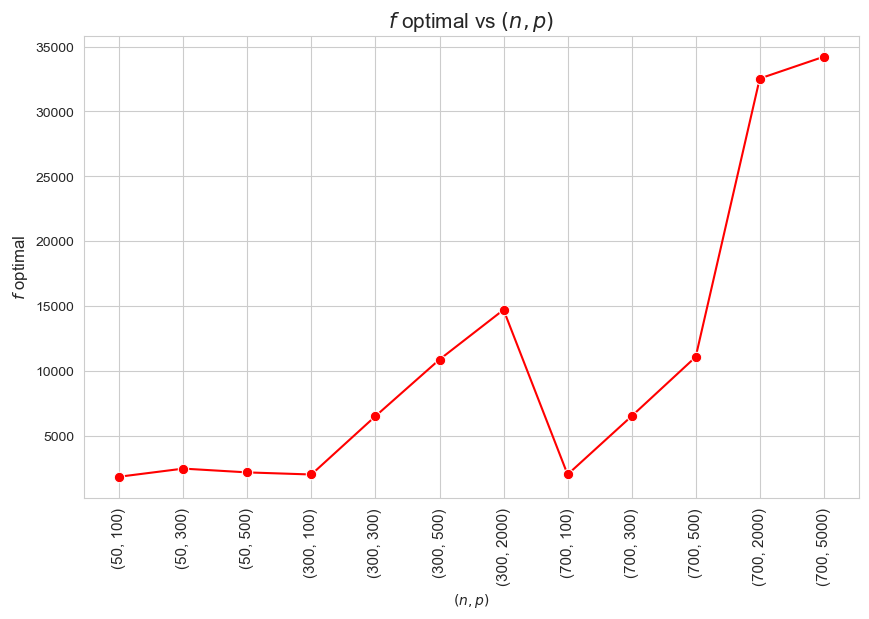

In [253]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['f_optimal_feasible'].values(), x=param_combi_feasible_str,
                  marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $(n,p)$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$(n,p)$', size=10)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
# plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

- **$f$ optimal vs Problem dimensionality $(n\cdot p)$**

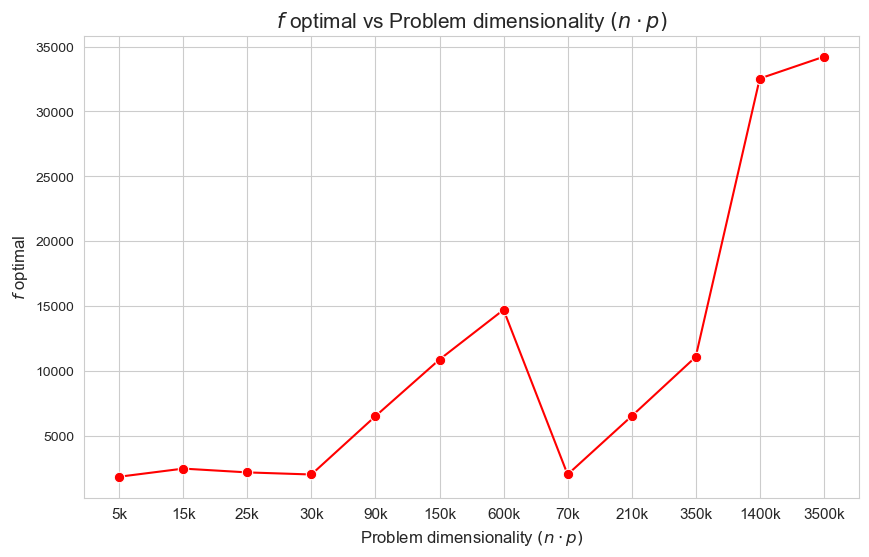

In [254]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['f_optimal_feasible'].values(), x=problem_dimension_feasible_str,
                  marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_feasible_str, fontsize=11)
# plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

The more dimensionality $(n\cdot p)$, the higher optimal value of the objective function. 


- **Avg. time per patient vs $(n,p)$**

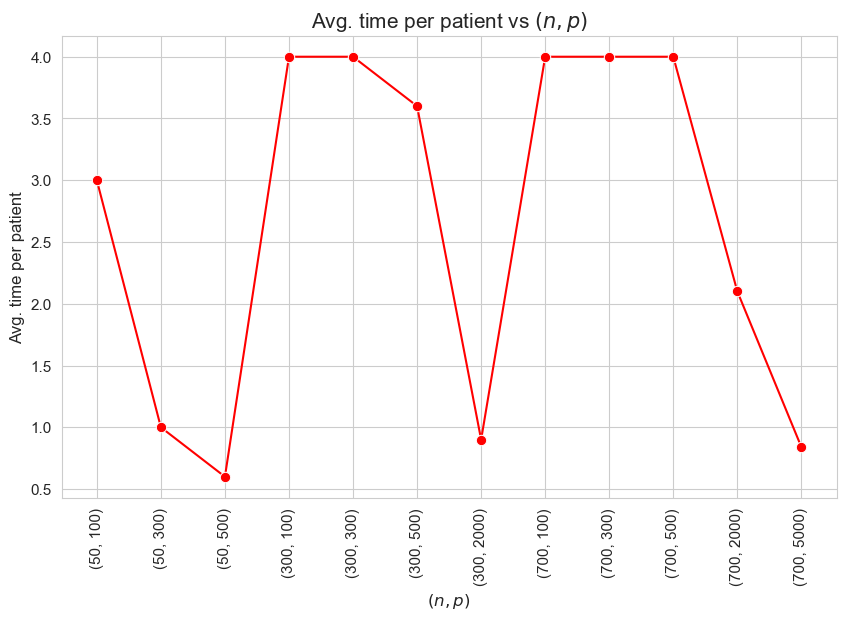

In [255]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=param_combi_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $(n,p)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
plt.yticks(fontsize=11)
plt.show()

- **Avg. time per patient vs Problem dimensionality $(n\cdot p)$**

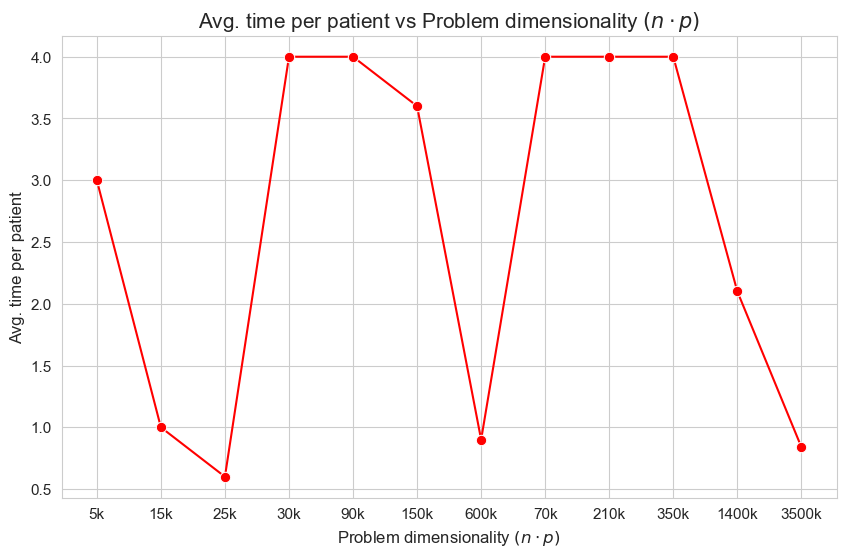

In [256]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=problem_dimension_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_feasible_str, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

- **Avg. time per patient vs Ratio patients per tandem $(p/n)$**

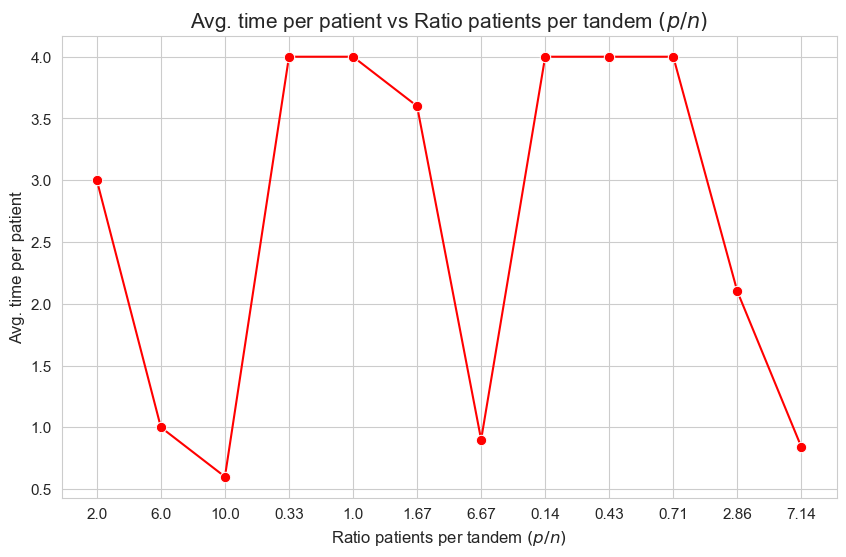

In [257]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=patient_tandem_ratio_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs Ratio patients per tandem $(p/n)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('Ratio patients per tandem $(p/n)$', size=12)
plt.xticks(patient_tandem_ratio_feasible_str, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The interpretation is simple and makes perfect sense. When the ration patients per tandem $(p/n)$ increases, the average time spent per patient decrease. and vice versa. 

- **Avg. time per patient vs $w$ vs $(n,p)$**

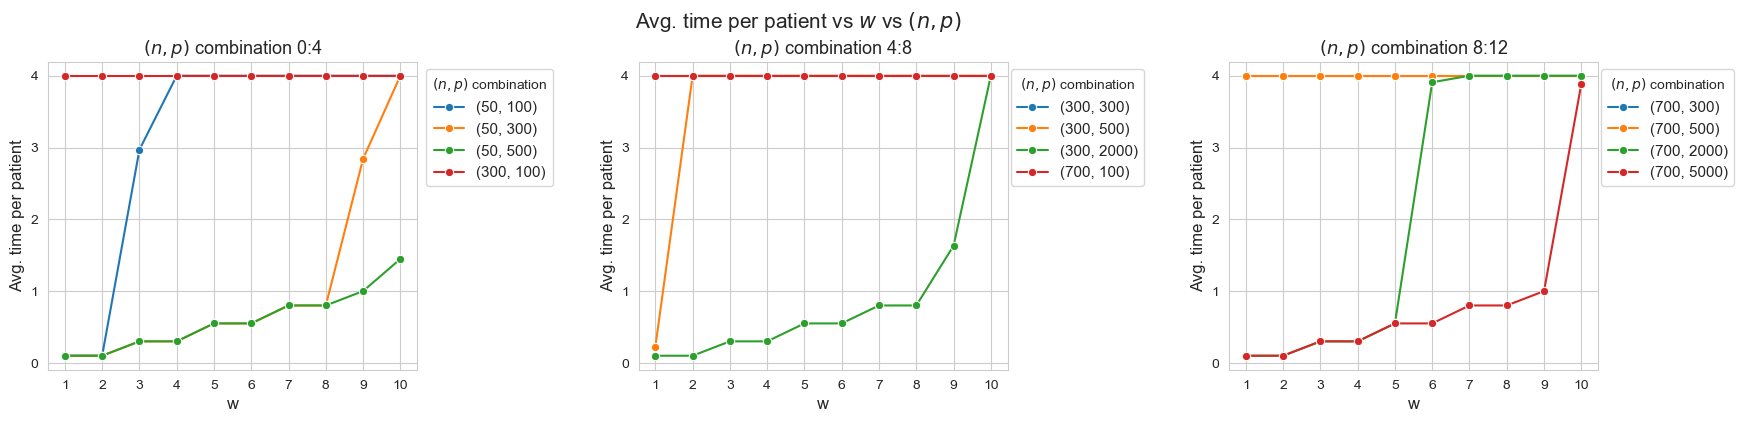

In [258]:
n_cols = 3
interval_width = 4
figsize = (20,4)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for combi in param_combi_feasible[limits[i]:limits[i+1]] :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=str(combi), marker='o', markersize=6, ax=ax)
    ax.set_title(f'$(n,p)$ combination {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$(n,p)$ combination', loc='upper right', bbox_to_anchor=(1.39, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs $(n,p)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

- **Avg. time per patient vs $w$ vs Problem dimensionality $(n\cdot p)$**

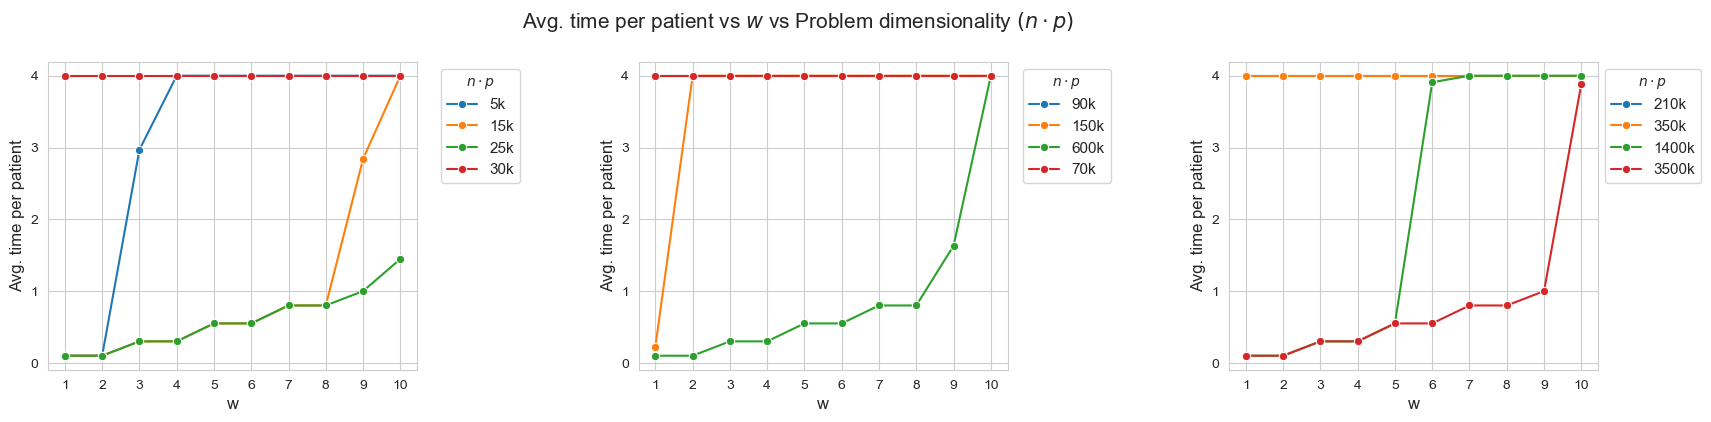

In [259]:
n_cols = 3
interval_width = 4
figsize = (20,4)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for label, combi in zip(problem_dimension_feasible_str[limits[i]:limits[i+1]], param_combi_feasible[limits[i]:limits[i+1]]) :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=label, marker='o', markersize=6, ax=ax)
    # ax.set_title(f'$n\cdot p$ {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$n\cdot p$', loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs Problem dimensionality $(n\cdot p)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

- **Average time spent per patient vs $w$ vs Ratio patients per tandem $(p/n)$**

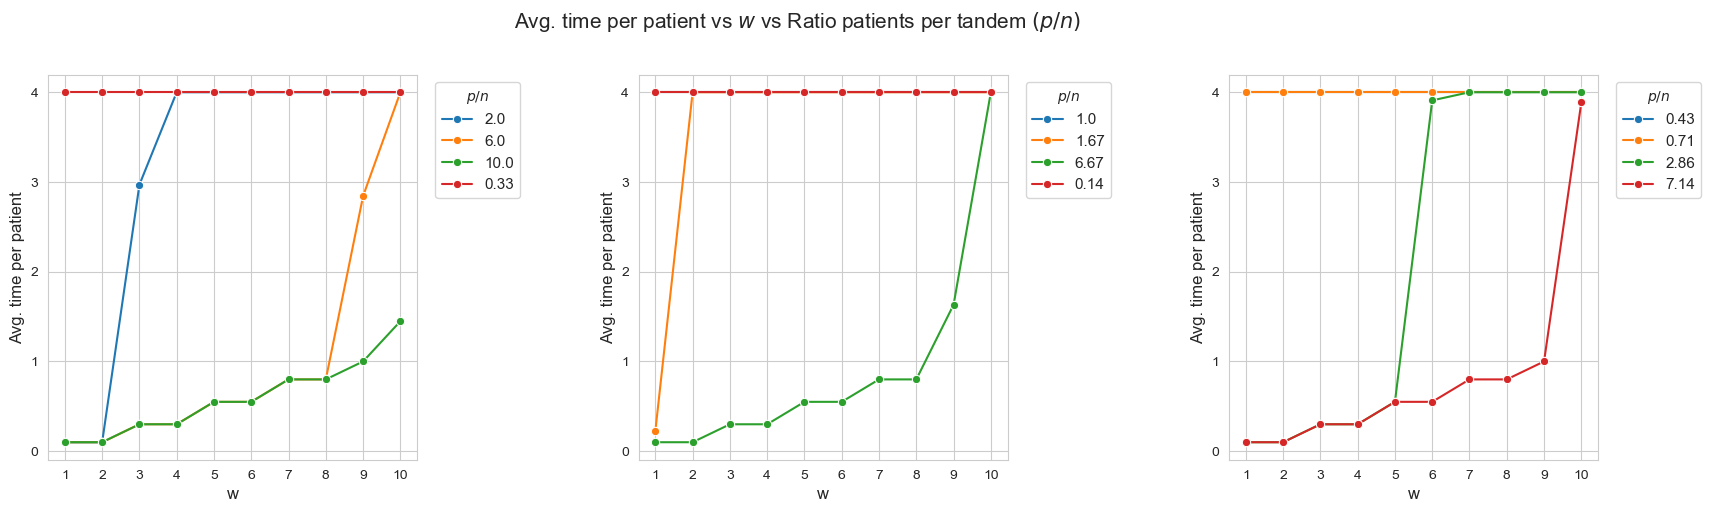

In [260]:
n_cols = 3
interval_width = 4
figsize = (20,5)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for label, combi in zip(patient_tandem_ratio_feasible_str[limits[i]:limits[i+1]], param_combi_feasible[limits[i]:limits[i+1]]) :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=label, marker='o', markersize=6, ax=ax)
    # ax.set_title(f'$p/n$  {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$p/n$', loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs Ratio patients per tandem $(p/n)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

**Interpretation of the results:**

When the ratio patients per tandem $(p/n)$ decreases, the average time spent per patient increases according with their severity.

Another important point to highlight is that, when  ratio patients per tandem  is small enough, like for intance with $p/n = 0.33$ (red line, first plot), all the patients are seen as much as possible $(h_4 =4)$, regardless of their severity. And, when the ratio increases, the average time spent in the less severe patients starts to decrease, as for example with $p/n = 2$ (blue line, first plot), $p/n=2.86$, (green line, third plot) or $p/n=6$ (yellow line, first plot).

**Allowing the number of patients seen to be lower than $p$, setting $h_3^{12} = h_3^{12} = 0$**

In [261]:
# Defining the values of the rest of parameters and setting h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10 as None.
params['n'] = None ; params['p']=None ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0 
params['h3_3_4'] = 0
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

params['w'] = None

# Defining the parameter combination values as a list.
p_list = [100, 300, 500, 2000, 5000]
n_list = [50, 300, 700]
np.random.seed(123)
w_dict = {p: np.random.randint(1, 11, p) for p in p_list}
param_combi_list_1 = product(n_list, p_list)
param_combi_list_1 = list(param_combi_list_1)
param_combi_list_2 = [(n,p, w_dict[p]) for (n,p) in param_combi_list_1]

# Defining the parameter names as a tuple.
param_names = ('n', 'p', 'w')

In [262]:
# results1_multi = get_results1_multi(('n', 'p', 'w'), param_combi_list_2, params, model='linear')

In [263]:
# results2_multi = get_results2_multi(('n', 'p', 'w'), results1_multi, n_p_analysis=True, w_dict=w_dict)

In [264]:
# save a dictionary as a pickle
#with open('results1_multi_n_p_2.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results1_multi, file)

#with open('results2_multi_n_p_2.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results2_multi, file)

In [265]:
# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results1_multi_n_p_2.pickle", 'rb') as file:
    # Read back the pickled file
    results1_multi = pickle.load(file)

# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results2_multi_n_p_2.pickle", 'rb') as file:
    # Read back the pickled file
    results2_multi = pickle.load(file)
# Time: 4 - 6.41 mins

In [266]:
param_combi_str = [str(x) for x in param_combi_list_1]
problem_dimension_str = [str(round(n*p/1000))+'k' for (n,p) in param_combi_list_1]
problem_dimension = [n*p/1000 for (n,p) in param_combi_list_1]
patient_tandem_ratio_str = [str(round(p/n, 2)) for (n,p) in param_combi_list_1] # number patients per nurse-doctor tandem

param_combi_feasible = [x for x in results2_multi[param_names]['feasible']]
param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]
problem_dimension_feasible_str = [str(round(n*p/1000))+'k' for (n,p) in results2_multi[param_names]['feasible']]
patient_tandem_ratio_feasible_str = [str(round(p/n, 2)) for (n,p) in results2_multi[param_names]['feasible']] 

- **Model execution time vs $(n,p)$**

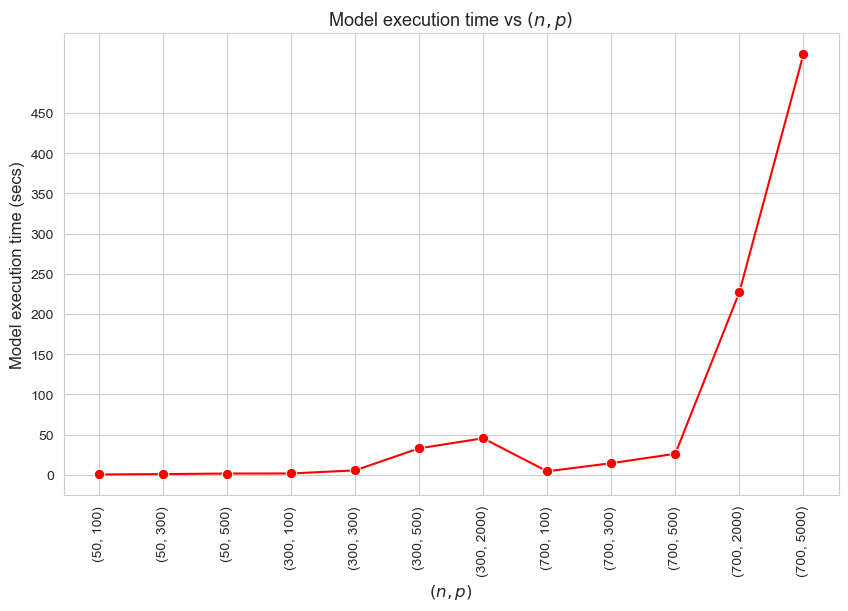

In [267]:
plt.subplots(figsize=(10,6))
ax = sns.lineplot(y=[results1_multi[param_names][i]['model_time'] for i in results2_multi[param_names]['feasible']], 
                     x=param_combi_feasible_str, 
                     marker='o', markersize=7.5, color='red')
plt.title('Model execution time vs $(n, p)$', fontsize=13) 
ax.set_xlabel('$(n, p)$', fontsize=12, rotation=0)
ax.set_ylabel('Model execution time (secs)', fontsize=12)
plt.yticks(np.arange(0, 500, 50))
plt.xticks(rotation=90)
plt.show()

- **Model execution time vs Problem dimensionality $(n\cdot p)$**

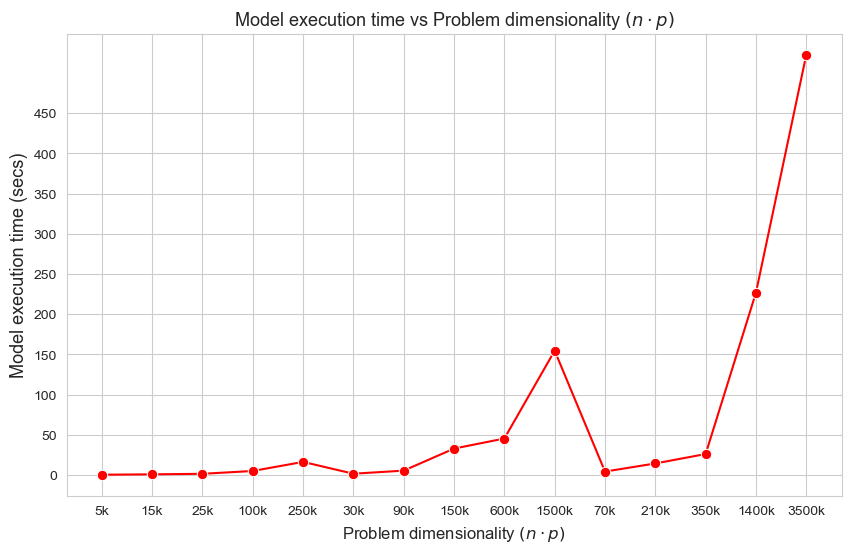

In [268]:
plt.subplots(figsize=(10,6))
ax = sns.lineplot(y=[results1_multi[param_names][i]['model_time'] for i in param_combi_list_1], 
                     x=problem_dimension_str, 
                     marker='o', markersize=7.5, color='red')
plt.title('Model execution time vs Problem dimensionality $(n\cdot p)$', fontsize=13) 
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', fontsize=12)
ax.set_ylabel('Model execution time (secs)', fontsize=13)
plt.yticks(np.arange(0, 500, 50))
plt.show()

**Interpretation of the results:**

These results  have an easy and intuitive interpretation.

When the dimensionality of the problem increase (in this case $n\cdot p$), the execution time of the model increases as well. And vice versa.


- **Type vs $(n,p)$**

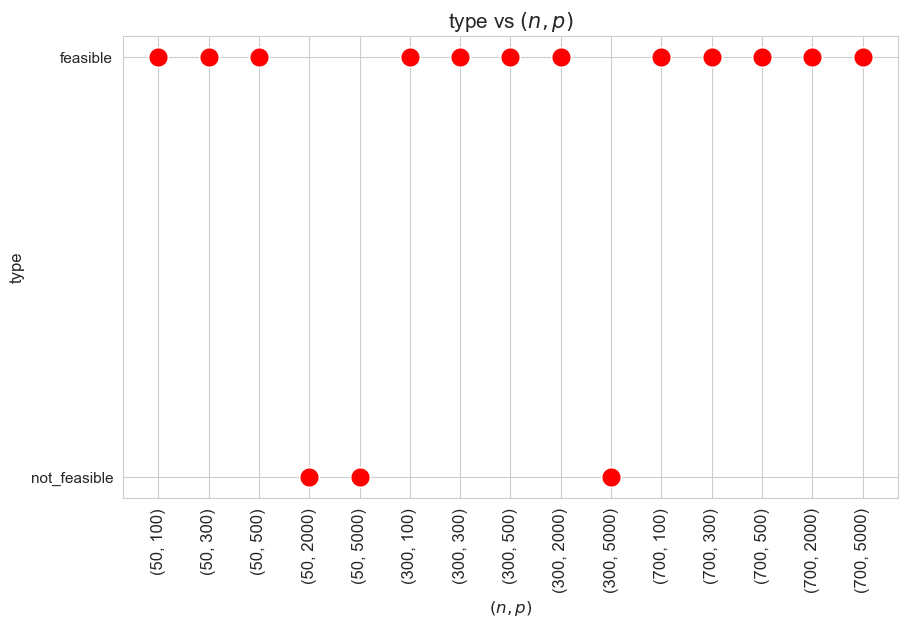

In [269]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=param_combi_str, color='red', s=200)
plt.title('type vs $(n,p)$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_str, fontsize=12, rotation=90)
plt.yticks(fontsize=11)
plt.show()

- **Type vs Problem dimensionality $(n\cdot p)$**

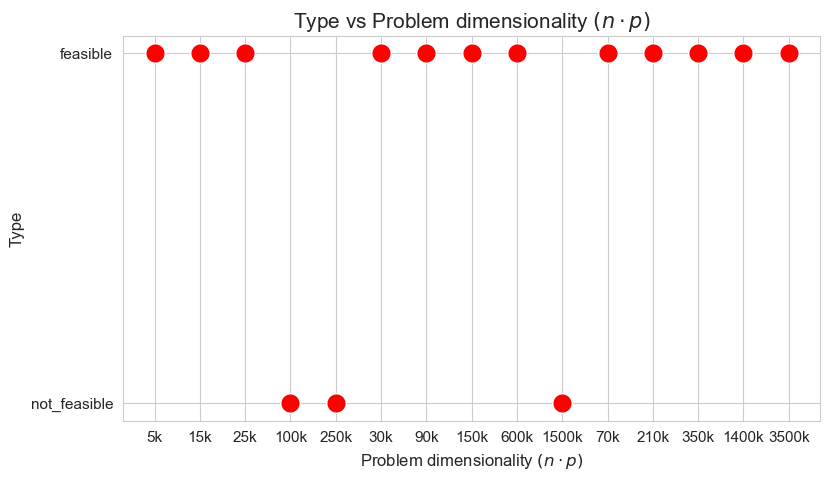

In [270]:
plt.figure(figsize=(9, 5))
param_combi_str = [str(x) for x in param_combi_list_1]
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=problem_dimension_str, color='red', s=200)
plt.title('Type vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('Type', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_str, fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.show()

- **Type vs Ratio patients per tandem $(p/n)$**

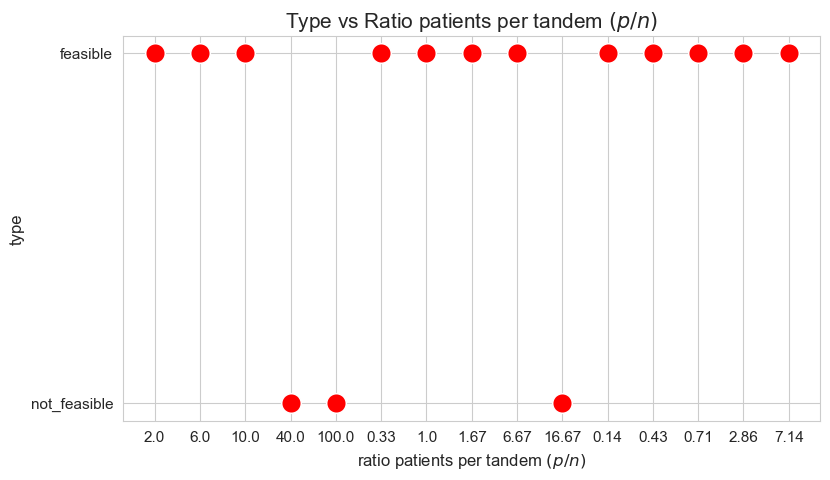

In [271]:
plt.figure(figsize=(9, 5))
param_combi_str = [str(x) for x in param_combi_list_1]
ax = sns.scatterplot(y=results2_multi[param_names]['type'], x=patient_tandem_ratio_str, color='red', s=200)
plt.title('Type vs Ratio patients per tandem $(p/n)$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('ratio patients per tandem $(p/n)$', size=12)
plt.xticks(patient_tandem_ratio_str, fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When the ratio patients per tandem $(p/n)$ is large enough, the problem becomes not feasible, as there are not enough tandems to handle such amount of patients, since minimum work constrains cannot be satisfy under good working conditions. 


- **Number of patients seen vs $(n,p)$**

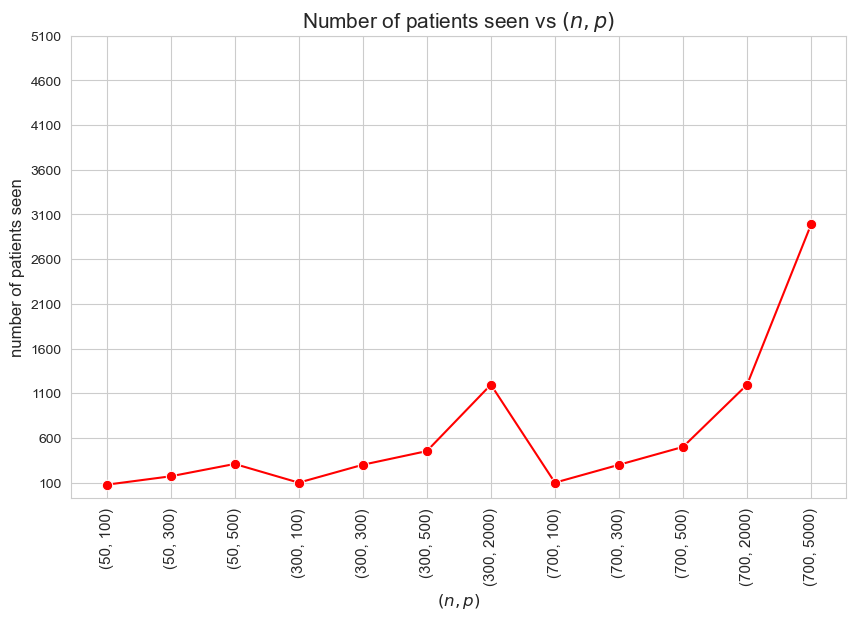

In [272]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['num_patients_seen'].values(), x=param_combi_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Number of patients seen vs $(n,p)$', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
plt.yticks(np.arange(100, 5500, 500))
plt.show()

**Interpretation of the results:**

Since we haven't enforced the number of patients seen to be $p$, due to the fact that we have set $h_3^{12}=h_3^{34} = 0$, there are cases in which the number of patients seen is lower than the maximum $(<p)$. 


- **$f$ optimal vs $(n,p)$**

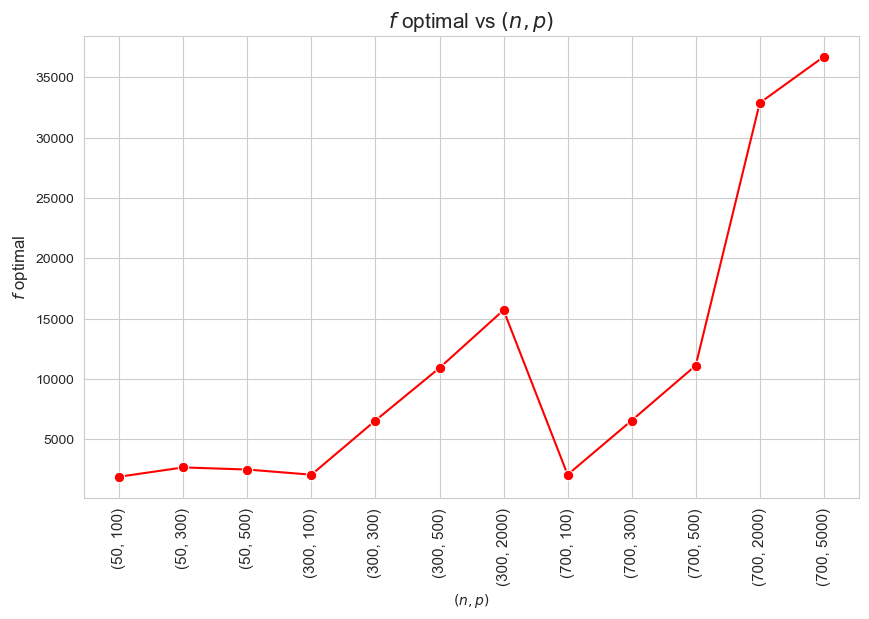

In [273]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['f_optimal_feasible'].values(), x=param_combi_feasible_str,
                  marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $(n,p)$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$(n,p)$', size=10)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
# plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

- **$f$ optimal vs Problem dimensionality $(n\cdot p)$**

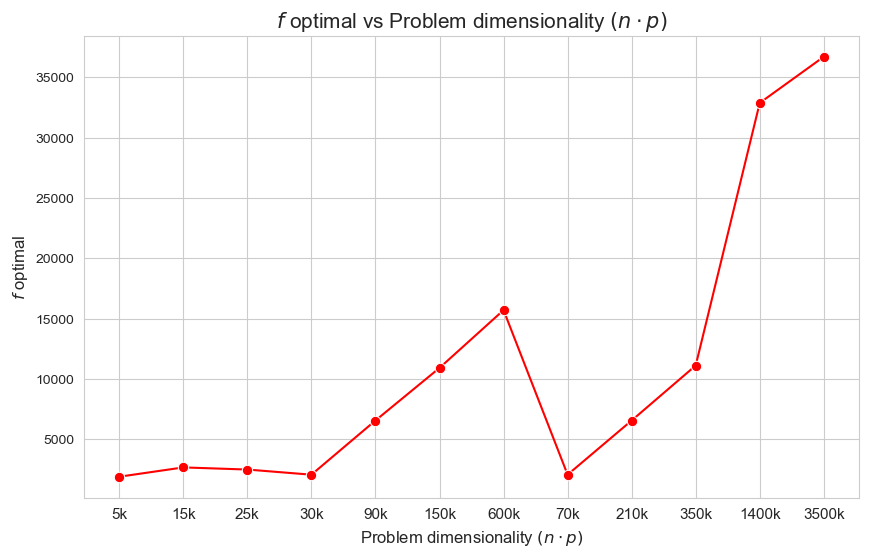

In [274]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['f_optimal_feasible'].values(), x=problem_dimension_feasible_str,
                  marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_feasible_str, fontsize=11)
# plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

The more dimensionality $(n\cdot p)$, the higher optimal value of the objective function. 


- **Avg. time per patient vs $(n,p)$**

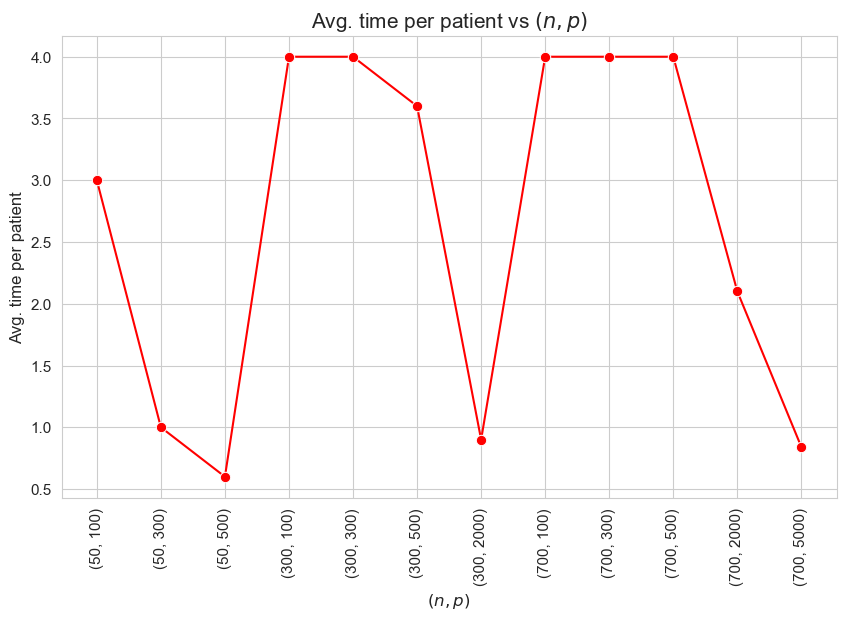

In [275]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=param_combi_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $(n,p)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$(n,p)$', size=12)
plt.xticks(param_combi_feasible_str, fontsize=11, rotation=90)
plt.yticks(fontsize=11)
plt.show()

- **Avg. time per patient vs Problem dimensionality $(n\cdot p)$**

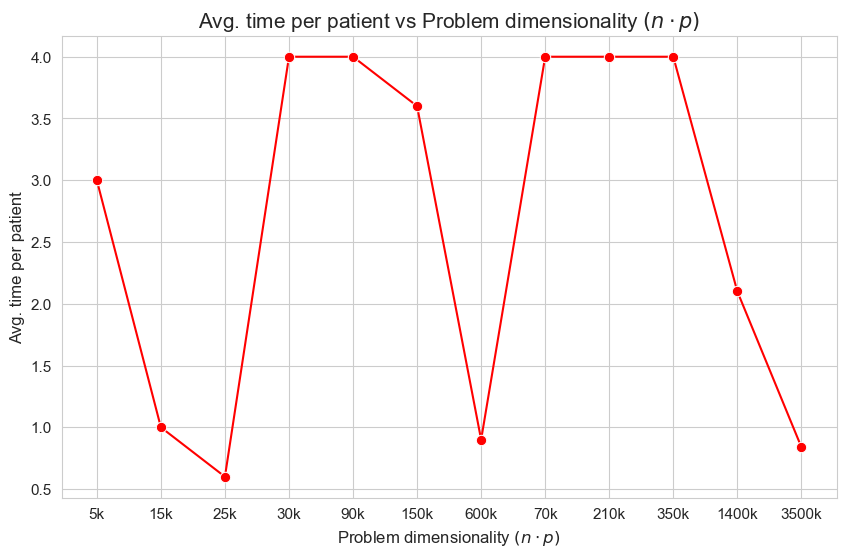

In [276]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=problem_dimension_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs Problem dimensionality $(n\cdot p)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('Problem dimensionality $(n\cdot p)$', size=12)
plt.xticks(problem_dimension_feasible_str, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

- **Avg. time per patient vs Ratio patients per tandem $(p/n)$**

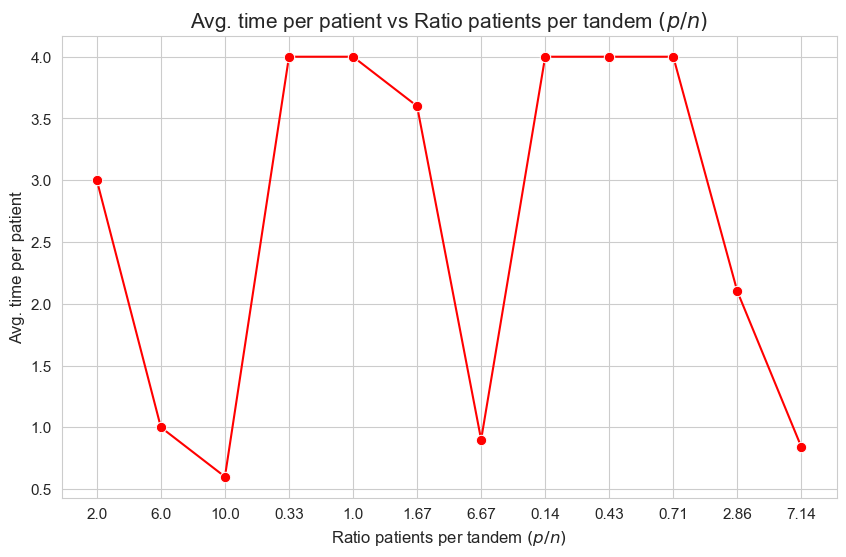

In [277]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(y=results2_multi[param_names]['avg_time_per_patient'].values(), x=patient_tandem_ratio_feasible_str, 
                  marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs Ratio patients per tandem $(p/n)$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('Ratio patients per tandem $(p/n)$', size=12)
plt.xticks(patient_tandem_ratio_feasible_str, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The interpretation is simple and makes perfect sense. When the ration patients per tandem $(p/n)$ increases, the average time spent per patient decrease. and vice versa. 

- **Avg. time per patient vs $w$ vs $(n,p)$**

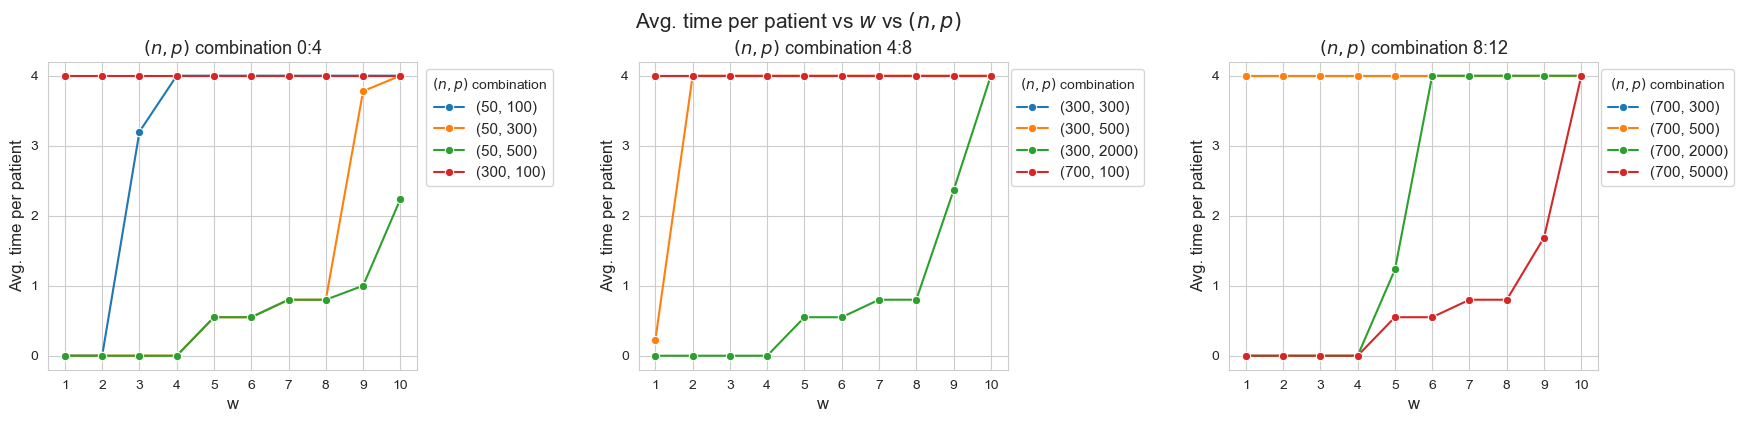

In [278]:
n_cols = 3
interval_width = 4
figsize = (20,4)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for combi in param_combi_feasible[limits[i]:limits[i+1]] :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=str(combi), marker='o', markersize=6, ax=ax)
    ax.set_title(f'$(n,p)$ combination {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$(n,p)$ combination', loc='upper right', bbox_to_anchor=(1.39, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs $(n,p)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

- **Avg. time per patient vs $w$ vs Problem dimensionality $(n\cdot p)$**

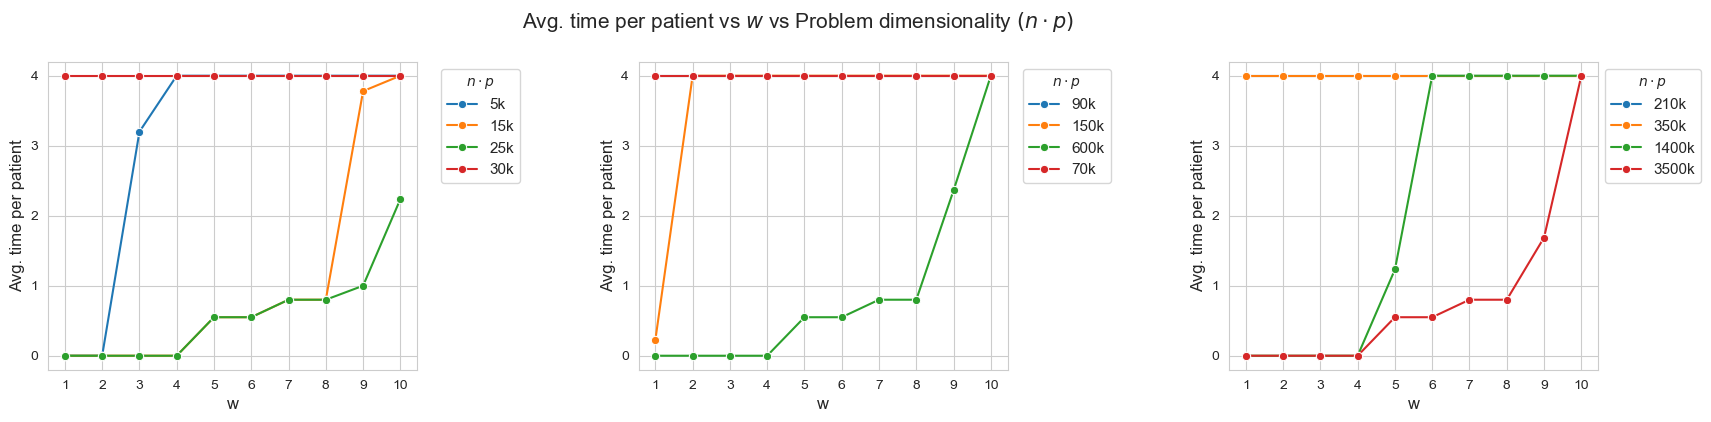

In [279]:
n_cols = 3
interval_width = 4
figsize = (20,4)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for label, combi in zip(problem_dimension_feasible_str[limits[i]:limits[i+1]], param_combi_feasible[limits[i]:limits[i+1]]) :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=label, marker='o', markersize=6, ax=ax)
    # ax.set_title(f'$n\cdot p$ {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$n\cdot p$', loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs Problem dimensionality $(n\cdot p)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

- **Average time spent per patient vs $w$ vs Ratio patients per tandem $(p/n)$**

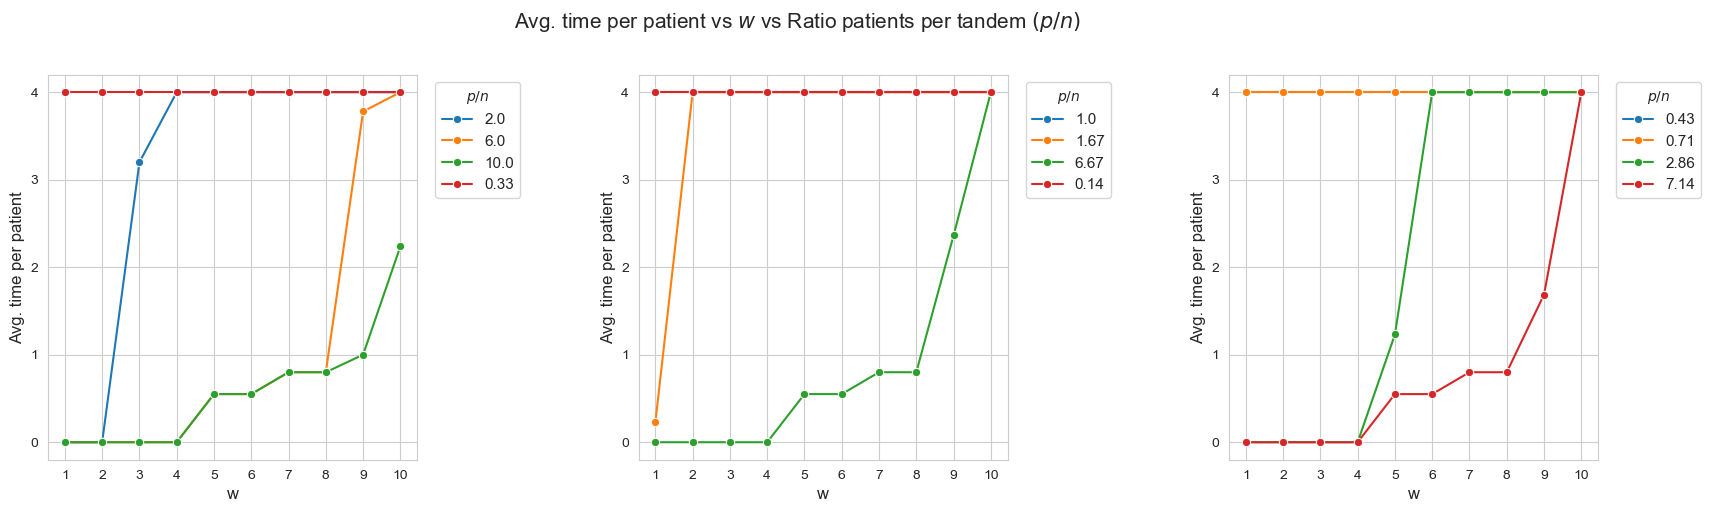

In [280]:
n_cols = 3
interval_width = 4
figsize = (20,5)

limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
limits.append(len(results2_multi[param_names]['feasible']))
n_intervals = len(limits) - 1

# Define the number of rows and columns for the matrix plot
n_rows = int(np.ceil(n_intervals / n_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()  

# Defining a ecdf-plot for each variable considered.
for i in range(0, n_intervals) :

    ax = axes[i]  # Get the current axis
    #ax.figure(figsize=(20, 10))
    for label, combi in zip(patient_tandem_ratio_feasible_str[limits[i]:limits[i+1]], param_combi_feasible[limits[i]:limits[i+1]]) :
        sns.lineplot(y=results2_multi[param_names]['avg_time_patient_per_w'][combi].values(), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][combi].keys(), 
                      label=label, marker='o', markersize=6, ax=ax)
    # ax.set_title(f'$p/n$  {limits[i]}:{limits[i+1]}', fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_yticks(range(0,5))
    ax.set_xticks(range(1,11))
    ax.set_xlabel('w', fontsize=12)
    ax.set_ylabel('Avg. time per patient', fontsize=12)
    ax.legend(title='$p/n$', loc='upper right', bbox_to_anchor=(1.30, 1), fontsize=11, ncol=1)

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(n_intervals, n_rows*n_cols):
    fig.delaxes(axes[j])

# Establishing a general tittle for the plot.
plt.suptitle('Avg. time per patient vs $w$ vs Ratio patients per tandem $(p/n)$', fontsize=15, y=1.01)
    
plt.subplots_adjust(hspace=1, wspace=0.6) 

**Interpretation of the results:**

When the ratio patients per tandem $(p/n)$ decreases, the average time spent per patient increases according with their severity.

Another important point to highlight is that, when  ratio patients per tandem  is small enough, like for intance with $p/n = 0.33$ (red line, first plot), all the patients are seen as much as possible $(h_4 =4)$, regardless of their severity. And, when the ratio increases, the average time spent in the less severe patients starts to decrease, as for example with $p/n = 2$ (blue line, first plot), $p/n=2.86$, (green line, third plot) or $p/n=6$ (yellow line, first plot).

If the binary variable $y_j$ in the integer model is relaxed in the interval $[0,1]\subset \mathbb{R}$, no changes are produced, since $y_j$ carries on working as a binary variable, so it is still performing like it did in the non relaxed integer model.

However, if $y_j$ is relaxed to $\mathbb{R}^+$ (positive real numbers), then the results of the relaxed model are slightly different to those of the non relaxed, concretely the number of patient seen $(396)$ is not maximum $(p=500)$, so the particular new constraint of this model (with respect to the linear one) is not working, since it is not enforcing the number of patients seen to be equal to $p$, and this is because $y_j$ is not working as a binary variable, and, therefore, it is not longer useful to impose that condition.